Lloyd's algorthm & K-Means ++ 

 
Let c1 = (0, 0, 0) and c2 = (0, 20, 0). Sample points uniformly at random from the ball B(c1, 9) centered at c1 and of radius r = 9. Similarly, sample 50 points uniformly at random from the ball B(c2, 9) centered at c2 and of the same radius r = 9. 

Run Kmeans algorithm on that data for k = 2 (do not use Kmeans++ for the initialization of the centers, but sample initial centers uniformly at random from all diﬀerent pairs of points). 

In [126]:
# Let c1 = (0, 0, 0) and c2 = (0, 20, 0). Sample 50 points uniformly at random from the ball B(c1, 9) centered 
# at c1 and of radius r = 9. Similarly, sample 50 points uniformly at random from the ball B(c2, 9) centered at c2 
# and of the same radius r = 9

import random
import numpy as np

# generating points from the sphere: for this, I am generating points in the cube [x + r, y + r, z + r] and
# I am discarding points that are located farther than r from the center of the sphere. To do this, I will
# simply use points that respect the inequality: (x-Cx)^2 + (y-Cy)^2 + (z-Cz)^2 <= radius^2

def sampling(c):
    sample = []
    while len(sample) < 50:
        x = random.uniform(c[0]-9,c[0]+9)
        y = random.uniform(c[1]-9,c[1]+9)
        z = random.uniform(c[2]-9,c[2]+9)
        l = [x,y,z]
        test = pow((x-c[0]),2) + pow((y-c[1]),2) + pow((z-c[2]),2)
        if test <= pow(9,2):
            sample.append(l)                
        else:
            continue
    return sample

c1 = [0,0,0]
c2 = [0,20,0]
sample1 = sampling(c1)
sample2 = sampling(c2)
data = sample1 + sample2  # I want to have a single database with all 100 points to run K-Means on it

In [127]:
# Run Kmeans algorithm on that data for k = 2 (do not use Kmeans++ for the initialization of the centers, but sample
# initial centers uniformly at random from all diﬀerent pairs of points)

def initial_c(dataset):
    c_random = dataset[random.randrange(0,len(dataset))]
    return c_random

# running K-Means 100 times to compare the average number of iterations needed to recover optimal sets

def KMeans(iter):

    Iter_simul = []
    Cost_Func_simul = []
    
    for j in range(iter): 

        # chosing two centers at random in the dataset to be my initial centers 

        c1_random = initial_c(data)
        c2_random = initial_c(data) 

        # making sure that the two centers chosen at random are different

        while c2_random == c1_random:  
            c2_random = initial_c(data)

        # need to initiate two centers as 'nan' to use comparison of centers in forst iteration    

        centers_i = ['nan', 'nan', c1_random, c2_random] 
        cost_function_i = []
        iteration = 0

        # iterating as long as centers change from one iteration to another. For that I am comparing centers c1 and c1' 
        # as well as centers c2 and c2' after each iteration. If there are no changes in centers, the K-Means 
        # algorithm stops

        while centers_i[-1] != centers_i[-3] and centers_i[-2] != centers_i[-4]: 
            cost_function_i.append(0)
            set1 = []
            set2 = []

            # calculating the distance from each datapoint in the database to the two current centers to determine 
            # which set should the point be assigned to. The point will be assigned to the set for which center is the
            # closest to the point. This is called the cost function

            for i in data:
                d1 = pow(i[0]-centers_i[(iteration)*2 + 2][0],2) + pow(i[1] - centers_i[(iteration)*2 + 2][1],2) + pow(i[2] - centers_i[(iteration)*2 + 2][2],2) # computing the euclidean distance of point i to center 1
                d2 = pow(i[0]-centers_i[(iteration)*2 + 3][0],2) + pow(i[1] - centers_i[(iteration)*2 + 3][1],2) + pow(i[2] - centers_i[(iteration)*2 + 3][2],2) # computing the euclidean distance of point i to center 2
                if d1 <= d2:   
                    set1.append(i)
                    cost_function_i[iteration] += d1 
                else:
                    set2.append(i)
                    cost_function_i[iteration] += d2

            # I now have my two sets for the current iteration. I need to calculate the new centers - which are defined
            # as the center of mass of sets 1 and 2. Those centers will minimize the distance within the points and a 
            # common center inside the two current sets.

            X,Y,Z = 0,0,0
            for points_1 in set1:
                X += points_1[0]
                Y += points_1[1]
                Z += points_1[2]
            if len(set1) != 0:
                c1_star = [X/len(set1), Y/len(set1), Z/len(set1)]  # calculating center of mass of set 1
            else:
                c1_star = [0,0,0] # avoiding division by zero case (in case there is a set with no points in it)

            X,Y,Z = 0,0,0
            for points_2 in set2:
                X += points_2[0]
                Y += points_2[1]
                Z += points_2[2]
            if len(set2) != 0:
                c2_star = [X/len(set2), Y/len(set2), Z/len(set2)]  # calculating center of mass of set 2
            else:
                c2_star = [0,0,0]

            centers_i.append(c1_star)
            centers_i.append(c2_star)
            iteration += 1

        Cost_Func_simul.append(cost_function_i)
        Iter_simul.append(iteration)
        
    return Iter_simul, Cost_Func_simul

Iter_sim, Cost_Func = KMeans(100)


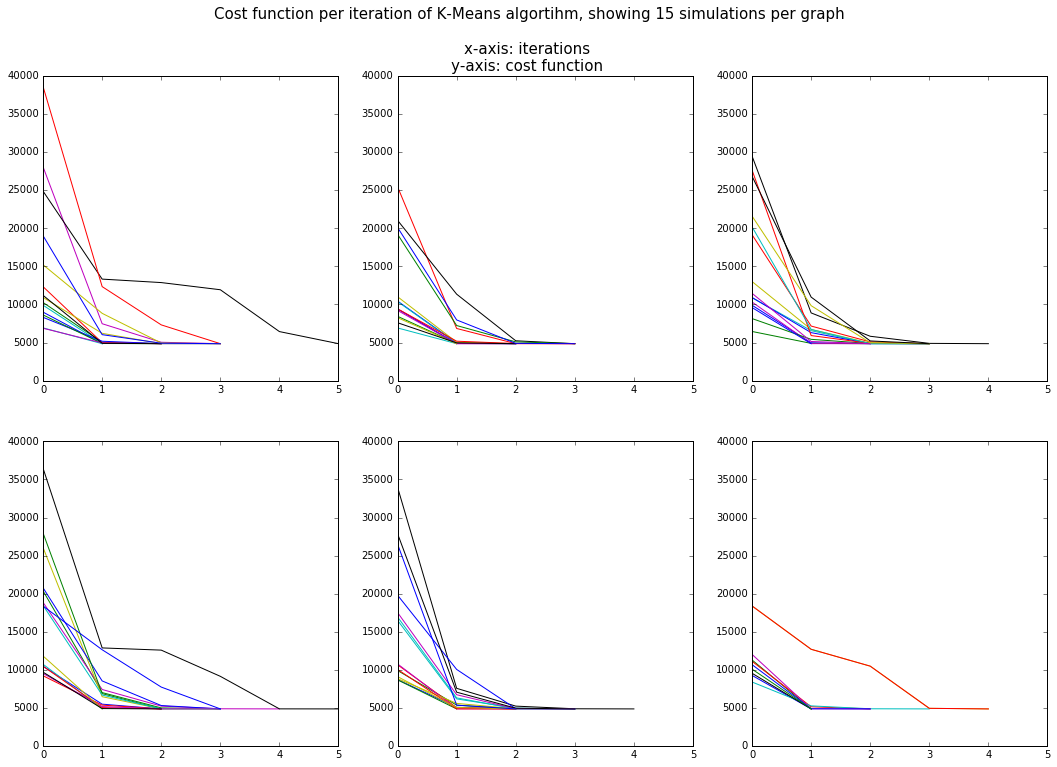

In [128]:
# Drawing diagrams showing how the cost function depends on the number of conducted iterations.
# Drawing 15 simulations per graph, with each graph showing the number of iterations before reaching a K-Means result set
# and the cost function decreasing for each iteration

import matplotlib.pyplot as plt

%matplotlib inline 

fig = plt.figure(1, figsize=(18, 12))
plt.axis('equal')


a = plt.subplot(231)
a.set_xticks([0,1,2,3,4,5,6])

for i in range(15):
    plt.plot(Cost_Func[i])
plt.subplot(232, sharex=a, sharey=a)
for i in range(15,30):
    plt.plot(Cost_Func[i])
plt.subplot(233, sharex=a, sharey=a)
for i in range(30,45):
    plt.plot(Cost_Func[i])
plt.subplot(234, sharex=a, sharey=a)
for i in range(60,75):
    plt.plot(Cost_Func[i])
plt.subplot(235, sharex=a, sharey=a)
for i in range(75,90):
    plt.plot(Cost_Func[i])
plt.subplot(236, sharex=a, sharey=a)
for i in range(90,100):
    plt.plot(Cost_Func[i])
    
plt.suptitle('''Cost function per iteration of K-Means algortihm, showing 15 simulations per graph

x-axis: iterations 
y-axis: cost function 

''', fontsize='15')

What we see from those graphics is that the cost function decreases with the number of iterations. This is to be expected as the K-means algorithm runs iterations to assign new centers to the points in the two sets. Those centers are centers of mass of the clusters and are thus the points that minimize the square distance (or in our case the cost function) between each point in the cluster. The points within the clusters may change from one cluster to another if the next cluster has a center for which the distance to the said point is smaller than that from its original center.

Overall, this technique will yield the same cost function in the final iteration of each simulation. 

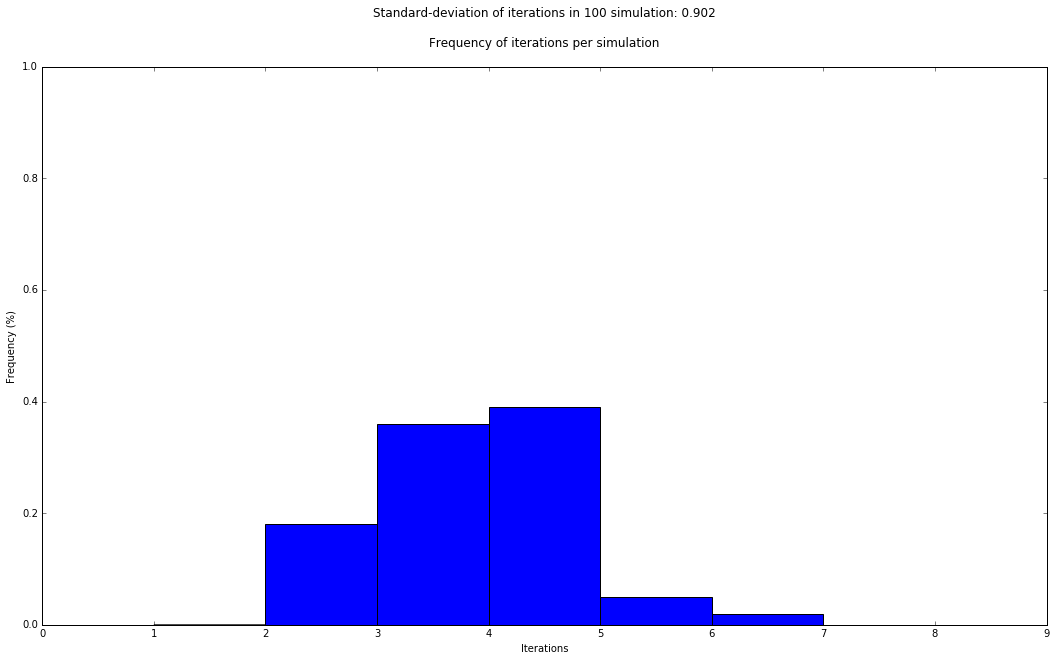

In [129]:
# Ploting an histogram with the frequency of the number of iterations per simulation 
# Also showing the standard deviation of the entire simulation set inside the graph

import numpy as np

hist = plt.figure(2, figsize=(18, 10))
plt.title('''Standard-deviation of iterations in 100 simulation: {:.3}

Frequency of iterations per simulation
'''.format(np.std(Iter_sim), fontsize=15))
plt.hist(Iter_sim, bins=[1,2,3,4,5,6,7,8], normed=True)
plt.axis([0,9,0,1])
plt.ylabel('Frequency (%)')
plt.xlabel('Iterations')


This time using Kmeans++ to ﬁnd initial centers. Comparing this variant of the Kmeans algorithm with the one that does not use Kmeans++, i.e. comparing the number of iterations needed to obtain stable clustering. 

In [130]:
# Running K-Means ++: For this, I will select one center at random and then calculate the probability that each
# remaining point in the dataset will be selected as the next center. For this exercise, I will only select one 
# additional center, in order to have two clusters from the dataset.

def total_distance(dataset, c1):
    totaldistance = 0
    for _ in dataset:
        totaldistance += pow(_[0]-c1[0],2) + pow(_[1]-c1[1],2) + pow(_[2]-c1[2],2)
    return totaldistance

def proba_center(dataset, c1):
    total_dist = total_distance(data, c1)    
    proba = []
    i_dist_cumul = 0
    for i, p in enumerate(dataset):
        i_dist = (pow(p[0]-c1[0],2) + pow(p[1]-c1[1],2) + pow(p[2]-c1[2],2)) / total_dist
        i_dist_cumul += i_dist
        proba.append([])
        proba[i].append(i_dist)
        proba[i].append(i_dist_cumul)
        proba[i].append(p)
    return proba

def random_selector(dataset, c1):
    
    u = random.random()
    selec = 0
    proba_cumul = proba_center(dataset, c1)
    while u > proba_cumul[selec][1]:
        selec +=1
    return proba_cumul[selec][2]   

def KMeans_plus(iter):
    
    Iter_simul_plus = []
    Cost_Func_simul_plus = []
    
    for j in range(iter): 

        # chosing one center at random in the dataset to be my initial center 

        c1_random = initial_c(data)
        c2_kmeans_plus = random_selector(data, c1_random)
    
        
        # need to initiate two centers as 'nan' to use comparison of centers in forst iteration    

        centers_i = ['nan', 'nan', c1_random, c2_kmeans_plus] 
        cost_function_i = []
        iteration = 0

        # iterating as long as centers change from one iteration to another. For that I am comparing centers c1 and c1' 
        # as well as centers c2 and c2' after each iteration. If there are no changes in centers, the K-Means 
        # algorithm stops

        while centers_i[-1] != centers_i[-3] and centers_i[-2] != centers_i[-4]: 
            cost_function_i.append(0)
            set1 = []
            set2 = []

            # calculating the distance from each datapoint in the database to the two current centers to determine 
            # which set should the point be assigned to. The point will be assigned to the set for which center is the
            # closest to the point. This is called the cost function

            for i in data:
                d1 = pow(i[0]-centers_i[(iteration)*2 + 2][0],2) + pow(i[1] - centers_i[(iteration)*2 + 2][1],2) + pow(i[2] - centers_i[(iteration)*2 + 2][2],2) # computing the euclidean distance of point i to center 1
                d2 = pow(i[0]-centers_i[(iteration)*2 + 3][0],2) + pow(i[1] - centers_i[(iteration)*2 + 3][1],2) + pow(i[2] - centers_i[(iteration)*2 + 3][2],2) # computing the euclidean distance of point i to center 2
                if d1 <= d2:   
                    set1.append(i)
                    cost_function_i[iteration] += d1 
                else:
                    set2.append(i)
                    cost_function_i[iteration] += d2

            # I now have my two sets for the current iteration. I need to calculate the new centers - which are defined
            # as the center of mass of sets 1 and 2. Those centers will minimize the distance within the points and a 
            # common center inside the two current sets.

            X,Y,Z = 0,0,0
            for points_1 in set1:
                X += points_1[0]
                Y += points_1[1]
                Z += points_1[2]
            if len(set1) != 0:
                c1_star = [X/len(set1), Y/len(set1), Z/len(set1)]  # calculating center of mass of set 1
            else:
                c1_star = [0,0,0] # avoiding division by zero case (in case there is a set with no points in it)

            X,Y,Z = 0,0,0
            for points_2 in set2:
                X += points_2[0]
                Y += points_2[1]
                Z += points_2[2]
            if len(set2) != 0:
                c2_star = [X/len(set2), Y/len(set2), Z/len(set2)]  # calculating center of mass of set 2
            else:
                c2_star = [0,0,0]

            centers_i.append(c1_star)
            centers_i.append(c2_star)
            iteration += 1

        Cost_Func_simul_plus.append(cost_function_i)
        Iter_simul_plus.append(iteration)
        
    return Iter_simul_plus, Cost_Func_simul_plus

Iter_sim_plus, Cost_Func_plus = KMeans_plus(100)


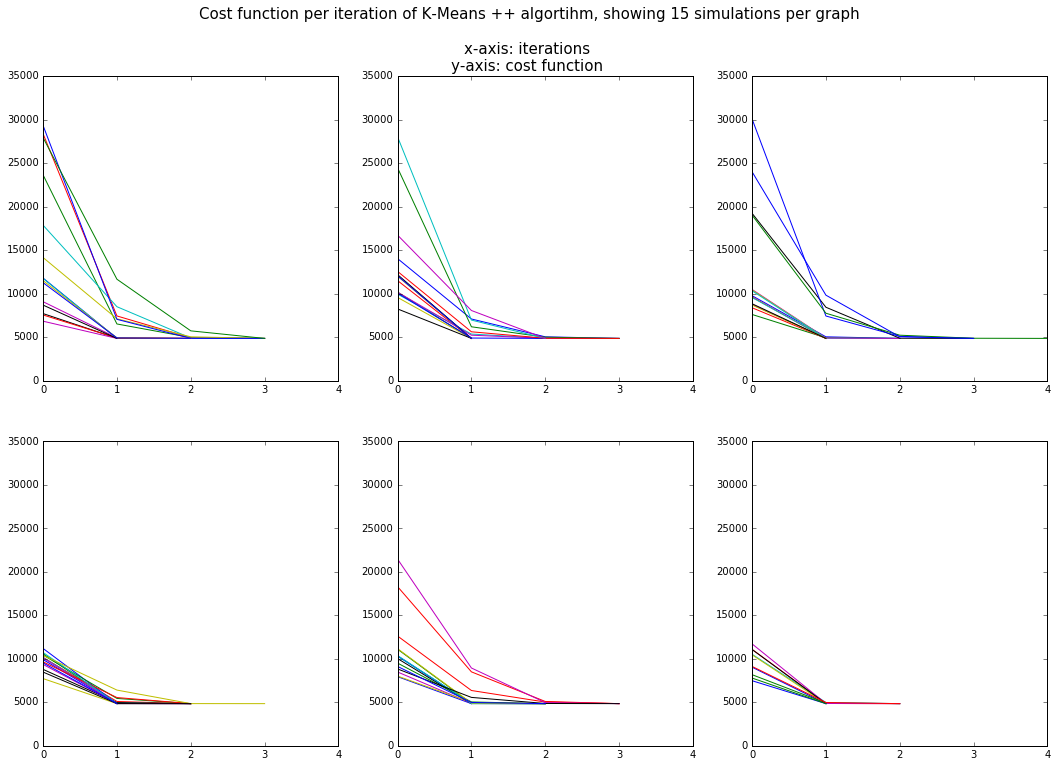

In [131]:
fig3 = plt.figure(3, figsize=(18, 12))
plt.axis('equal')

plus = plt.subplot(231)
plus.set_xticks([0,1,2,3,4,5,6])

for i in range(15):
    plt.plot(Cost_Func_plus[i])
plt.subplot(232, sharex=plus, sharey=plus)
for i in range(15,30):
    plt.plot(Cost_Func_plus[i])
plt.subplot(233, sharex=plus, sharey=plus)
for i in range(30,45):
    plt.plot(Cost_Func_plus[i])
plt.subplot(234, sharex=plus, sharey=plus)
for i in range(60,75):
    plt.plot(Cost_Func_plus[i])
plt.subplot(235, sharex=plus, sharey=plus)
for i in range(75,90):
    plt.plot(Cost_Func_plus[i])
plt.subplot(236, sharex=plus, sharey=plus)
for i in range(90,100):
    plt.plot(Cost_Func_plus[i])
    
plt.suptitle('''Cost function per iteration of K-Means ++ algortihm, showing 15 simulations per graph

x-axis: iterations 
y-axis: cost function 

''', fontsize='15')

## Results of K-Means ++ versus K-Means

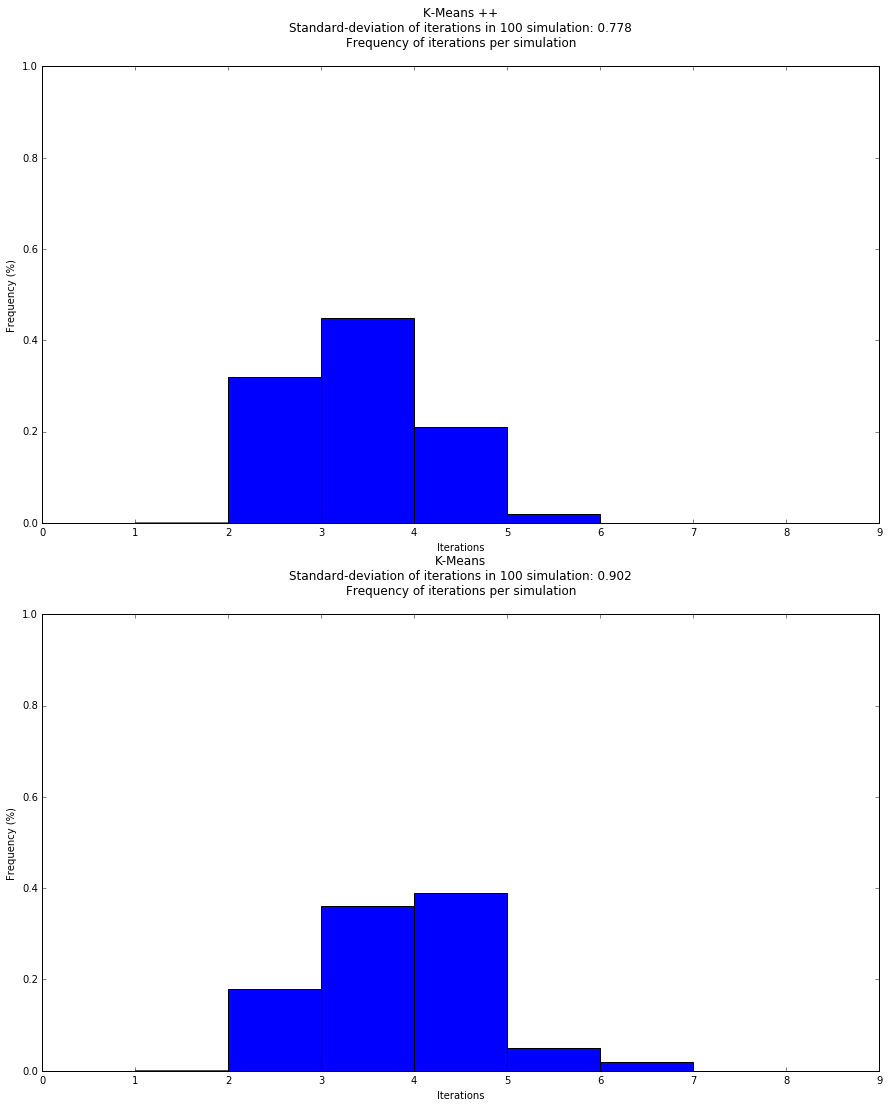

In [132]:
hist2 = plt.figure(4, figsize=(15, 18))

plt.subplot(211)
plt.title('''K-Means ++
Standard-deviation of iterations in 100 simulation: {:.3}
Frequency of iterations per simulation
'''.format(np.std(Iter_sim_plus), fontsize=15))
plt.hist(Iter_sim_plus, bins=[1,2,3,4,5,6,7,8], normed=True)
plt.axis([0,9,0,1])
plt.ylabel('Frequency (%)')
plt.xlabel('Iterations')

plt.subplot(212)

plt.title('''K-Means
Standard-deviation of iterations in 100 simulation: {:.3}
Frequency of iterations per simulation
'''.format(np.std(Iter_sim), fontsize=15))
plt.hist(Iter_sim, bins=[1,2,3,4,5,6,7,8], normed=True)
plt.axis([0,9,0,1])
plt.ylabel('Frequency (%)')
plt.xlabel('Iterations')


We do witness a small difference in the number of required iterations when using the K-Means ++ algorithm versus the original K-Means algorithm. To be noted that the difference comes from the initiation step (the initial choice of centers). In the case of the K-Means ++ algorithm, we let the computer randomely select a second center based on the probability of each center being selected next. This probability is calculated using the distance from each point to the first center divided by the total distance of each point to the center. 

We set that the upper bound of the cost function must be the square distance of each point in the database 
relative to the two initial centers of the balls: (0,0,0) and (0,20,0). As the K-Means algorithm seeks to shift
centers to minimize the sum of the square distance of each datapoint from its center, we know that taking (0,0,0) and
(0,20,0) as centers will provide an upper bound when calculating the cost function. 


In [133]:
upper_bound_cost = 0
for i in data:
    d1 = pow(i[0]-0,2) + pow(i[1]-0,2) + pow(i[2]-0,2) 
    d2 = pow(i[0]-0,2) + pow(i[1]-20,2) + pow(i[2]-0,2) # computing the euclidean distance of point i to center 2
    if d1 <= d2:   
        upper_bound_cost += d1 
    else:
        upper_bound_cost += d2
print('We see that the upper bound of the cost function is {:.5} (using the min square distance of each point in the dataset from (0,0,0) and (0,20,0)) and that the cost function of the K-Means ++ algorithm is {:.5}'.format(upper_bound_cost, Cost_Func_plus[1][-1]))

We see that the upper bound of the cost function is 4957.1 (using the min square distance of each point in the dataset from (0,0,0) and (0,20,0)) and that the cost function of the K-Means ++ algorithm is 4848.1
